In [1]:
def is_notebook() -> bool:
    try:
        shell = get_ipython().__class__.__name__
        if shell == 'ZMQInteractiveShell':
            return True   # Jupyter notebook or qtconsole
        elif shell == 'TerminalInteractiveShell':
            return False  # Terminal running IPython
        else:
            return False  # Other type (?)
    except NameError:
        return False      # Probably standard Python interpreter    

if is_notebook():
    %load_ext autoreload
    %autoreload 2

import math
import os
import svgwrite
from svgwrite import Drawing
from IPython.display import SVG
from typing import NamedTuple
from enum import Enum
from typing import List

# custom libs
from primitives import *
from arc_drawing import *
from calendar_data import *
from calendar_drawings import *

In [2]:
# Get months to draw

canvas_width = 11
width = inchToMilimeter(8)
outermost_radius = width / ( 2 * 3.14 / 12)
# outermost_radius = inchToMilimeter(35)
inner_radius = outermost_radius * 9.2 / 10
month_thickness = (outermost_radius - inner_radius)
date_box_height = month_thickness * 0.18

solarMonths = []

for index, month in enumerate(solar_year.months):
    name_upside_down = (index >= 3 and index < 9)
    for day in month.num_days:
        solarMonths.append(
            MonthInstance(
                name=month.name,
                num_days=day,
                color=month.color,
                name_upside_down=name_upside_down,
                date_on_top=False, # the outer month
                date_box_height=date_box_height,
                inner_radius=inner_radius,
                outer_radius=outermost_radius,
            )
        ) 


islamicMonths = []
month_offset = 5
for index, month in enumerate(islamic_year.months):
    name_upside_down = (index >= 3 and index < 9)
    for day in month.num_days:
        islamicMonths.append(
            MonthInstance(
                name=month.name,
                num_days=day,
                color=month.color,
                name_upside_down=name_upside_down,
                date_on_top=True, # the outer month
                date_box_height=date_box_height,
                inner_radius=inner_radius - month_thickness - month_offset,
                outer_radius=outermost_radius - month_thickness - month_offset,
            )
        ) 

Failed to get connection
** (inkscape:8653): CRITICAL **: 09:17:26.871: dbus_g_proxy_new_for_name: assertion 'connection != NULL' failed

** (inkscape:8653): CRITICAL **: 09:17:26.871: dbus_g_proxy_call: assertion 'DBUS_IS_G_PROXY (proxy)' failed

** (inkscape:8653): CRITICAL **: 09:17:26.871: dbus_g_connection_register_g_object: assertion 'connection != NULL' failed


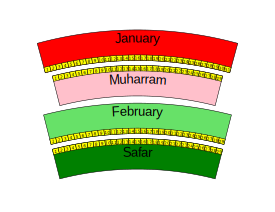

In [3]:


# width = outermost_radius * 2 * 3.14 / 12 / 2
width_center = inchToMilimeter(canvas_width) / 2
vertical_offset = 30
origin_first = Point(width_center, outermost_radius + vertical_offset)
origin = origin_first

days_in_year = 366

for i in range(int(len(solarMonths)/2)):
    dwg = getPageCanvas()

    origin = origin_first
    drawMonthParts(dwg, getMonth(solarMonths[2 * i], days_in_year, origin))
    drawMonthParts(dwg, getMonth(islamicMonths[2 * i], days_in_year, origin))
    
    origin = Point(origin.x, origin.y + (month_thickness * 2.4))
    drawMonthParts(dwg, getMonth(solarMonths[2 * i + 1], days_in_year, origin))
    drawMonthParts(dwg, getMonth(islamicMonths[2 * i + 1], days_in_year, origin))

    svg_file = f"out/test_output_{i}.svg"
    pdf_file = f"out/calendar_page_{i}.pdf"

    dwg.saveas(svg_file, pretty=True)
    # os.system(f"convert {svg_file} {pdf_file}")
    os.system(f"inkscape {svg_file} --export-pdf={pdf_file}")
    break

SVG(dwg.tostring())

In [ ]:

# darc = getDimensionalArc(Point(100,100), 60, 90, -135, -45, fill="red")
# print(darc.path())

# dwg.add(darc.drawnPath(dwg))

# darc = getDimensionalArc(Point(100,120), 60, 70, -135, -45, fill="yellow")
# dwg.add(darc.drawnPath(dwg))

#dwg.add(dwg.path(d="m 64.64466094067262,64.64466094067262 A 50,50 0 0 1 135.35533905932738,64.64466094067262 L 128.2842712474619,71.7157287525381 A 40,40 71.7157287525381,71.7157287525381L 64.64466094067262,64.64466094067262",
#stroke="#DDD", fill="none"))

# arc1 = arcPath(Point(100, 100), 50, -135, -45)
# arc2 = arcPath(Point(100, 120), 50, -45, -135)

# dwg.add(arc1.drawnPath(dwg))
# dwg.add(arc2.drawnPath(dwg))

In [58]:

dwg = svgwrite.Drawing()
dwg.viewbox(0,0,500,220)

x1 = 200
y1 = 200
r1 = 50
arc = math.sqrt(2*(r1**2))

# setup canvas
dwg = svgwrite.Drawing()
dwg.viewbox(0,0,500,220)

# def getTextAlongArc(arc: Arc, text: str):
  

# Print text centered along path 
path = dwg.path(
        d=f"m {x1},{y1} " + # starting point
          f"a{r1},{r1} 0 0 1 {arc},0 " + # first arc
          f"a{r1},{r1} 0 0 0 {arc},0 ", # second arc
        stroke="#DDD",
        fill="none")
text = svgwrite.text.Text("")
text.add(svgwrite.text.TextPath(path, text="soy sol sonatora", startOffset="50%", method="align", text_anchor="middle"))
dwg.add(path)
dwg.add(text)

text2 = svgwrite.text.Text("testing", insert="100, 100", fill="rgb(0,255,0)", text_anchor="middle", alignment_baseline="middle")
circ = svgwrite.shapes.Circle(center=(100,100), r=5)
dwg.add(circ)
dwg.add(text2)
# make_circle(x1,y1,r1)
# extension = 50
# (x2, y2) = extend_line_point((x1+r1, y1+r1),(x1,y1), extension)
# print((x2, y2))
# extend_circle(x2,y2,50+extension)

SVG(dwg.tostring())

TypeError: 'insert' should be a <tuple> or a <list>  with at least two elements.

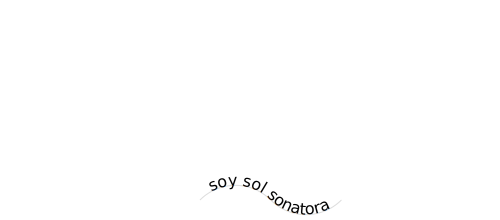

In [118]:


dwg = svgwrite.Drawing()
dwg.viewbox(0,0,500,220)
#dwg.add(dwg.line((0, 0), (100, 100), stroke='black'))
dwg.add(dwg.text('Test', insert=(50, 20)))

for r in range(10,100,5):
    dwg.add(dwg.circle(center=(300,100), r=r, fill='blue', opacity='0.05'))

#for n in range(11,100,5):
    #dwg.add(dwg.line((0, 0), (100, n), stroke='black'))

dwg.add(dwg.text("how are you doing", insert=(200, 300)))

x1 = 200
y1 = 200
r1 = 50
arc = math.sqrt(2*(r1**2))

# setup canvas
dwg = svgwrite.Drawing()
dwg.viewbox(0,0,500,220)

# Print text centered along path 
path = dwg.path(
        d=f"m {x1},{y1} " + # starting point
          f"a{r1},{r1} 0 0 1 {arc},0 " + # first arc
          f"a{r1},{r1} 0 0 0 {arc},0 ", # second arc
        stroke="#DDD",
        fill="none")
text = svgwrite.text.Text("")
text.add(svgwrite.text.TextPath(path, text="soy sol sonatora", startOffset="50%", method="align", text_anchor="middle"))
dwg.add(path)
dwg.add(text)

# make_circle(x1,y1,r1)
# extension = 50
# (x2, y2) = extend_line_point((x1+r1, y1+r1),(x1,y1), extension)
# print((x2, y2))
# extend_circle(x2,y2,50+extension)

SVG(dwg.tostring())

In [119]:

# def extend_line_point(start, ext, len):
#     m = (ext[0] - start[0])/(ext[1]-start[1])
#     print (f"(ext[0] - start[0]) = {(ext[0] - start[0])}")
#     print(f"(ext[1]-start[1]) = {(ext[1]-start[1])}")
#     print(m)
#     extension_y = math.sqrt((len**2)/(1+m**2))
#     extension_x = m * extension_y

#     return (ext[0] - extension_x, ext[1] - extension_y)


# def make_circle(x, y, r):
#     arc = math.sqrt(2*(r**2))
#     print(f"arc={arc}")

#     dwg.add(dwg.path(
#             d=f'm {x},{y}  a{r},{r} 0 0 1 {arc},0 ',
#             stroke="#000",
#             fill="none"))
#     dwg.add(dwg.path(
#             d=f'm {x + arc},{y}  a{r},{r} 0 0 1 0,{arc} ',
#             stroke="#000",
#             fill="none"))
#     dwg.add(dwg.path(
#             d=f'm {x + arc},{y+arc}  a{r},{r} 0 0 1 {arc * -1}, 0 ',
#             stroke="#000",
#             fill="none"))
#     dwg.add(dwg.path(
#             d=f'm {x},{y+arc} a{r},{r} 0 0 1 0,{arc * -1} ',
#             stroke="#000",
#             fill="none"))

# def extend_circle(x, y, r):
#     arc = math.sqrt(2*(r**2))
#     print(f"arc={arc}")

#     dwg.add(dwg.path(
#             d=f'm {x},{y}  a{r},{r} 0 0 1 {arc},0 ',
#             stroke="#000",
#             fill="none"))

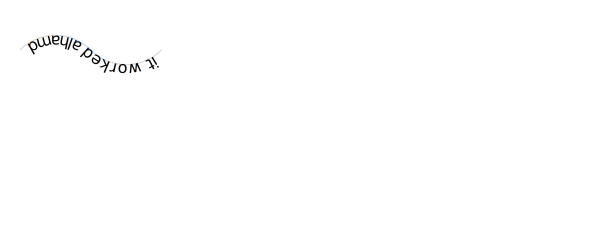

In [120]:
# setup canvas
dwg = svgwrite.Drawing()
dwg.viewbox(0,0,600,250)

# Create a path
x1 = 20
y1 = 50
r1 = 50
arc = math.sqrt(2*(r1**2))
path = dwg.path(
        d=f"m {x1+2*arc},{y1} " + # starting point
          f"a{r1},{r1} 0 0 1 {-arc},0 " + # first arc
          f"a{r1},{r1} 0 0 0 {-arc},0 ", # second arc
        # d=f"m {x1},{y1} " + # starting point
        #  f"a{r1},{r1} 0 0 1 {arc},0 " + # first arc
        #  f"a{r1},{r1} 0 0 0 {arc},0 ", # second arc         
        stroke="#DDD",
        fill="none")

path2 = dwg.path(
        d=f"m {x1},{y1} " + # starting point
          f"a{r1},{r1} 0 0 1 {arc},0 " + # first arc
          f"a{r1},{r1} 0 0 0 {arc},0 ", # second arc
        stroke="#DDD",
        fill="none",
        transform=f"rotate(180 {x1+arc} {y1})")

# Center text along path 
text = svgwrite.text.Text("")
text.add(svgwrite.text.TextPath(path, text="it worked alhamd", startOffset="50%", method="align", text_anchor="middle"))
# text.add(svgwrite.text.TextPath(path2, text="it worked alhamd", startOffset="50%", method="align", text_anchor="middle"))

# Draw path and text
dwg.add(path)
dwg.add(path2)
dwg.add(text)
SVG(dwg.tostring())
